In [ ]:
#data cleaning& preprocessing(tf dataset, data augmentation)=> model

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers.legacy import Adam

In [2]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS=3
EPOCHS=100

In [4]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
"plantvillage",
    shuffle=True,
    batch_size = BATCH_SIZE
)

Found 4188 files belonging to 4 classes.


In [5]:
class_names = dataset.class_names
class_names

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

In [6]:
len(dataset)

131

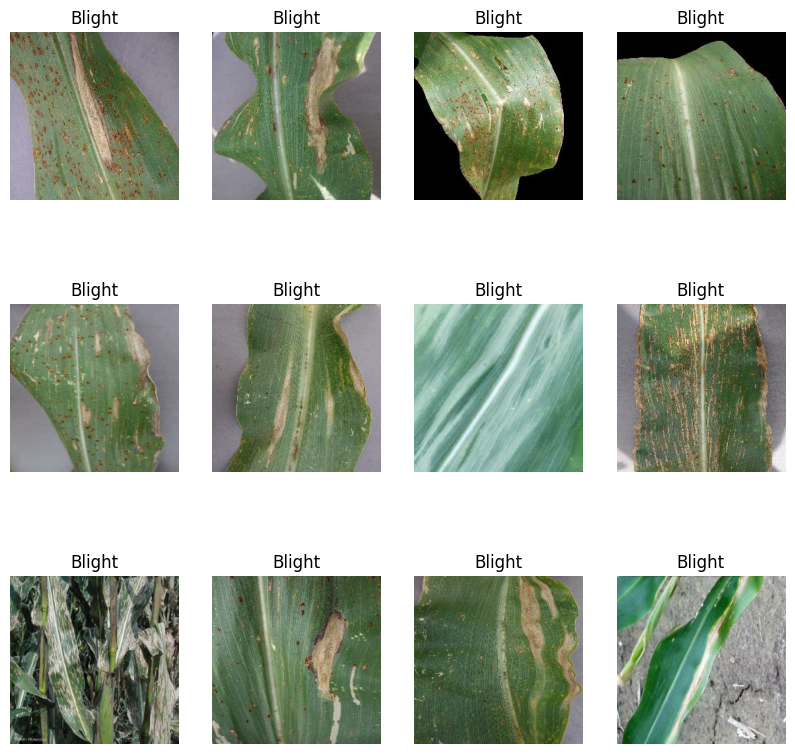

In [10]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[0]])
        plt.axis("off")


In [11]:
80% ==> training
20% ==> 10% validation, 10% test

SyntaxError: invalid syntax (829920516.py, line 1)

In [12]:
train_size = 0.8
len(dataset)*train_size


104.80000000000001

In [13]:
train_ds = dataset.take(104)
len(train_ds)

104

In [14]:
test_ds = dataset.skip(104) 
len(test_ds)

27

In [15]:
val_size = 0.1
len(dataset)*val_size

13.100000000000001

In [16]:
val_ds = test_ds.take(13)
len(val_ds)

13

In [17]:
test_ds = test_ds.skip(13)
len(test_ds)

14

In [18]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000 ):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    train_size = int( train_split * ds_size)
    val_size = int( val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [19]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [20]:
 len(train_ds)

104

In [21]:
 len(val_ds)

13

In [22]:
 len(test_ds)

14

In [23]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)

In [24]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [25]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.Rescaling(0.2),
])

In [26]:
input_shape = (BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE, CHANNELS) 
n_classes = 4
model = models.Sequential([
     resize_and_rescale,
     data_augmentation,
     layers.Conv2D(32, (3,3),  activation='relu', input_shape = input_shape),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64, kernel_size = (3,3),  activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64, kernel_size = (3,3),  activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64, (3,3), activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64, (3,3), activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64, (3,3), activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Flatten(),
     layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
    
]) 
model.build(input_shape= input_shape)





In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [28]:
model.compile(
optimizer='adam',
loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy']
)

In [29]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/100
104/104 [==============================] - 195s 2s/step - loss: 1.0326 - accuracy: 0.4949 - val_loss: 0.8838 - val_accuracy: 0.5505
Epoch 2/100
104/104 [==============================] - 168s 2s/step - loss: 0.6954 - accuracy: 0.7001 - val_loss: 0.5331 - val_accuracy: 0.7909
Epoch 3/100
104/104 [==============================] - 151s 1s/step - loss: 0.4409 - accuracy: 0.8183 - val_loss: 0.4126 - val_accuracy: 0.8630
Epoch 4/100
104/104 [==============================] - 152s 1s/step - loss: 0.3874 - accuracy: 0.8448 - val_loss: 0.4382 - val_accuracy: 0.8125
Epoch 5/100
104/104 [==============================] - 150s 1s/step - loss: 0.3427 - accuracy: 0.8640 - val_loss: 0.3508 - val_accuracy: 0.8630
Epoch 6/100
104/104 [==============================] - 155s 1s/step - loss: 0.3091 - accuracy: 0.8715 - val_loss: 0.3978 - val_accuracy: 0.8245
Epoch 7/100
104/104 [==============================] - 154s 1s/step - loss: 0.3254 - accuracy: 0.8673 - val_loss: 0.3424 - val_accuracy:

104/104 [==============================] - 157s 2s/step - loss: 0.0562 - accuracy: 0.9868 - val_loss: 0.9050 - val_accuracy: 0.8462
Epoch 58/100
104/104 [==============================] - 157s 2s/step - loss: 0.0569 - accuracy: 0.9844 - val_loss: 0.8847 - val_accuracy: 0.8678
Epoch 59/100
104/104 [==============================] - 159s 2s/step - loss: 0.0058 - accuracy: 0.9979 - val_loss: 1.1105 - val_accuracy: 0.8630
Epoch 60/100
104/104 [==============================] - 157s 2s/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 1.0331 - val_accuracy: 0.8654
Epoch 61/100
104/104 [==============================] - 219s 2s/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 1.1678 - val_accuracy: 0.8654
Epoch 62/100
104/104 [==============================] - 227s 2s/step - loss: 8.5019e-04 - accuracy: 0.9997 - val_loss: 1.1634 - val_accuracy: 0.8678
Epoch 63/100
104/104 [==============================] - 212s 2s/step - loss: 7.7822e-04 - accuracy: 0.9997 - val_loss: 1.2887 - val_accurac

In [30]:
scores = model.evaluate(test_ds)

14/14 [==============================] - 47s 555ms/step - loss: 1.3009 - accuracy: 0.8795


In [31]:
history

In [32]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 104}

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

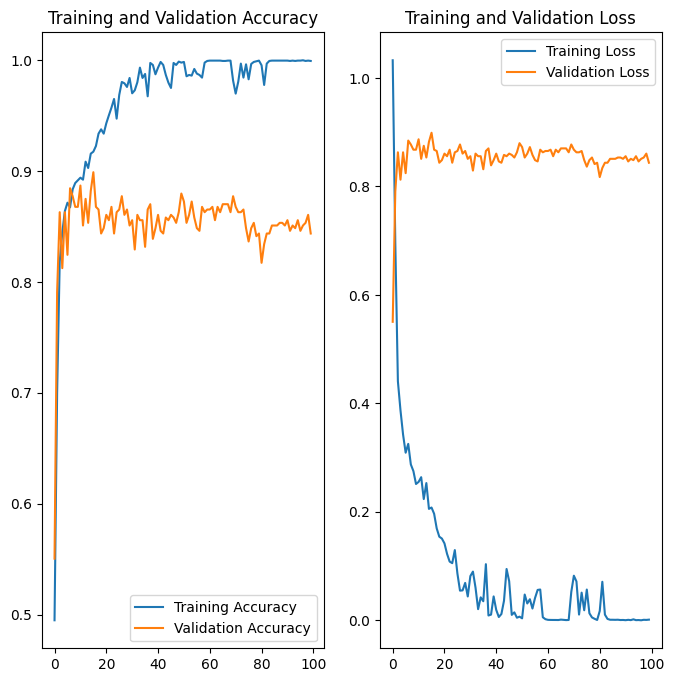

In [35]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_acc, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Gray_Leaf_Spot
1/1 [==============================] - 2s 2s/step
predicted label: Gray_Leaf_Spot


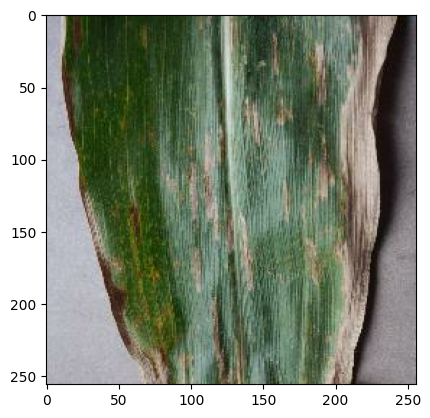

In [36]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
#     plt.imshow(images_batch[0].numpy().astype('uint8'))
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [37]:
  def predict(model, img):
        img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
        img_array = tf.expand_dims(img_array, 0)
        predictions = model.predict(img_array)
        predicted_class = class_names[np.argmax(predictions[0])]
        confidence = round(100 * (np.max(predictions[0])), 2)
        return predicted_class, confidence

1/1 [==============================] - 0s 63ms/step


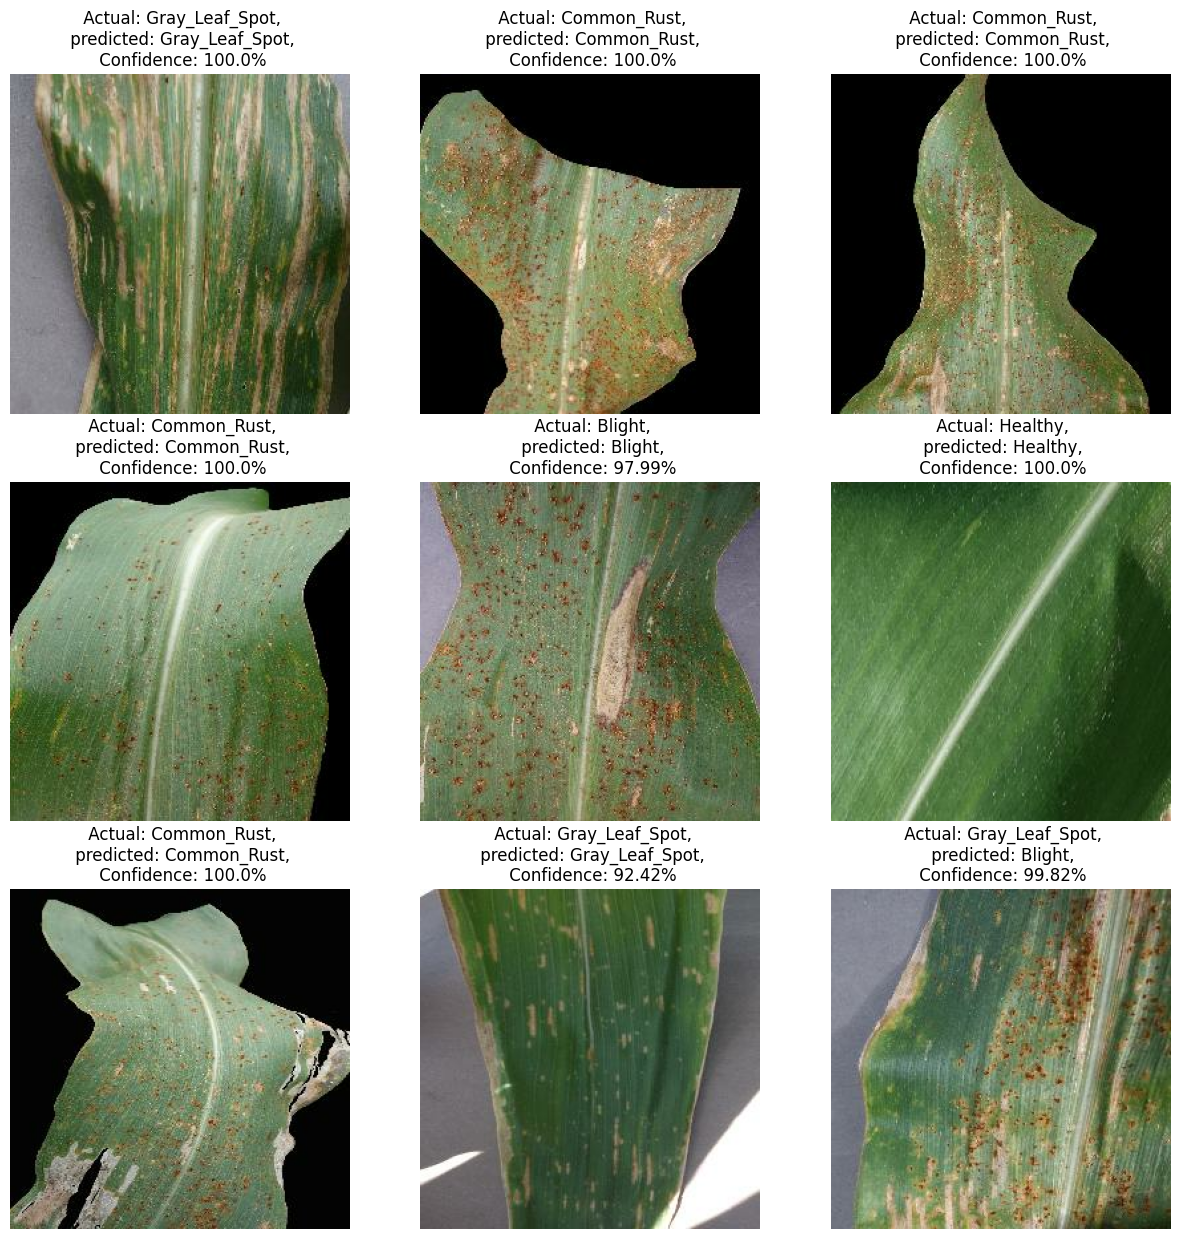

In [40]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f" Actual: {actual_class},\n predicted: {predicted_class},\n Confidence: {confidence}%")
        
        plt.axis("off")
        

In [39]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/4\assets


INFO:tensorflow:Assets written to: ../models/4\assets
